In [1]:
import os
import glob
import pandas as pd

In [2]:
csv_files = glob.glob("one_hidden_mlp_records/*/*trials.csv")

In [19]:
def make_dict(file_list, suffix_to_remove):
    data_dict = {}
    for f in file_list:
        # Extract the middle portion: records/<key>/<file>
        key = os.path.basename(os.path.dirname(f))  # folder name
        # Remove the specified suffix from the end of the key
        if key.endswith(suffix_to_remove):
            key = key[:-len(suffix_to_remove)]
        data_dict[key] = pd.read_csv(f)
    return data_dict

# Create dictionaries with specific suffix removal
parzen_files = [f for f in csv_files if os.path.basename(os.path.dirname(f)).endswith("_parzen")]
random_files = [f for f in csv_files if os.path.basename(os.path.dirname(f)).endswith("_random")]
parzen_dict = make_dict(parzen_files, "_parzen")
random_dict = make_dict(random_files, "_random")

In [20]:
from vizs import plot_efficiency_curves_best_of_N, plot_ard_panels, plot_accuracy_vs_param_panels

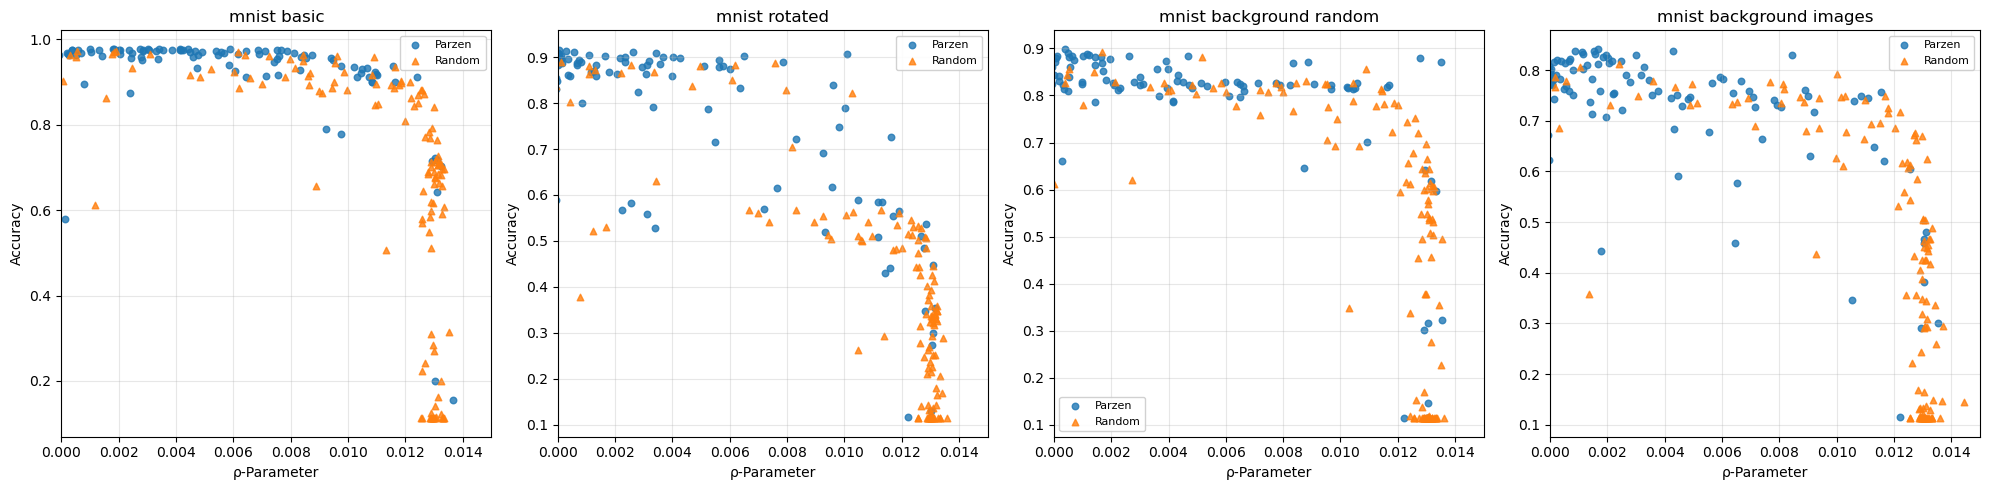

In [21]:
plot_accuracy_vs_param_panels(parzen_dict, random_dict,
                       acc_col="value", param_col="avg_fit_criteria",
                       #save_path="acc_vs_param_2x4_panels_scatter.png"
                     )